In [10]:
import openpyxl
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
excel_document = openpyxl.load_workbook('files/MUERTOS.xlsx')
sheets=excel_document.get_sheet_names()
#sheets.reverse()
list(pd.read_excel('files/MUERTOS.xlsx',sheets[1]).columns[:])
df5=pd.DataFrame(columns=list(pd.read_excel('files/MUERTOS.xlsx',sheets[1]).columns[:]))
for x in range(len(excel_document.get_sheet_names())):
    df5=pd.concat([df5, pd.read_excel('files/MUERTOS.xlsx',sheets[x], parse_dates=['Fecha Ocurrencia'], index=True)])
    df5.index=list(range(len(df5['Fecha Ocurrencia'])))
df5=pd.DataFrame({'Fecha Ocurrencia':df5['Fecha Ocurrencia'],
                 'Hora Ocurrencia':df5['Hora Ocurrencia'],
                 'Edad Víctima':df5['Años'],
                 'Sexo':df5['Sexo'],
                 'Clase de Accidente':df5['Clase'],
                 'Condición Víctima':df5['Condicion'],
                 'Vehículo Víctima o vehículo que atropella':df5['Vehículo Víctima o vehículo que atropella'],
                 'Dirección Ocurrencia':df5['Direccion Ocurrencia'],
                 'Prueba Embriaguez':df5['Embriaguez '],
                 'Empresa Servicio Público':df5['Empresa'],
                 'Fecha Levantamiento':df5['Fecha Levantamiento'],
                 'Lugar de Inspección':df5['Lugar de Inspección'],
                 'Servicio Publico o Particular':df5['Servicio']})
for x in range(len(list(df5.axes[1]))):
    for y in range(len(df5)):
        if df5[df5.columns[x]][y] == 'Sin inf.' or df5[df5.columns[x]][y] == 'No Reporta' or df5[df5.columns[x]][y] == 'NR' or df5[df5.columns[x]][y] == 'Sin Inf':
            df5[df5.columns[x]][y] = np.NaN
      



C:\Users\Paolo Camacho\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  if __name__ == '__main__':
C:\Users\Paolo Camacho\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  del sys.path[0]
C:\Users\Paolo Camacho\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
C:\Users\Paolo Camacho\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

In [2]:
sheets

['Medellín 2008',
 'Medellín 2009',
 'Medellín 2010',
 'Medellín 2011',
 'Medellín 2012',
 'Medellín 2013',
 'Medellín 2014',
 'Medellín 2015',
 'Medellín 2016',
 'Medellín 2017',
 'Medellín 2018',
 'Medellín 2019']

#GRAFICOS FRANJA HORARIA SEMANAL

In [13]:
df5=df5.dropna(subset=['Hora Ocurrencia'])
df5.index=list(range(len(df5['Hora Ocurrencia'])))
df5

,Fecha Ocurrencia,Hora Ocurrencia,Edad Víctima,Sexo,Clase de Accidente,Condición Víctima,Vehículo Víctima o vehículo que atropella,Dirección Ocurrencia,Prueba Embriaguez,Empresa Servicio Público,Fecha Levantamiento,Lugar de Inspección,Servicio Publico o Particular,Fecha y Hora Ocurrencia
0,2008-01-01,09:00:00,73,M,Atropello,Peatón,Auto,CR 44 CL 84,NaN,NaN,2008-01-01 00:00:00,Policlinica,NaN,2008-01-01 09
1,2008-01-02,16:55:00,2,M,Atropello,Peatón,Microbus,CR 25 CL 75C,0Mg%,NaN,2008-01-02 00:00:00,Unidad Intermedia de Manrique,NaN,2008-01-02 16
2,2008-01-04,17:30:00,86,M,Atropello,Peatón,Auto,CR 78 CL 32B,0Mg%,NaN,2008-01-04 00:00:00,Clinica las Americas,NaN,2008-01-04 17
3,2008-01-08,13:30:00,63,M,Atropello,Peatón,Auto,CR81 CL 18,0Mg%,NaN,2008-01-08 00:00:00,Clinica las Americas,NaN,2008-01-08 13
4,2008-01-09,07:26:00,61,M,Choque,Conductor Auto,Auto,CL 12S CR 25,NaN,NaN,2008-01-09 00:00:00,CL 12S CR 25,NaN,2008-01-09 07
5,2008-01-11,12:30:00,25,M,Choque,Motociclista,Moto,CR 64C CL 80,NaN,NaN,2008-01-11 00:00:00,CR 64C CL 80,NaN,2008-01-11 12
6,2008-01-11,10:30:00,57,F,Atropello,Peatón,Auto,CL 25 CR 65F,0Mg%,NaN,2008-01-12 00:00:00,Clinica las Americas,NaN,2008-01-11 10
7,2008-01-13,06:25:00,25,M,Choque,Ciclista,Bicicleta,CR 45 CL 71,NaN,NaN,2008-01-13 00:00:00,CR 45 CL 71,NaN,2008-01-13 06
8,2008-01-13,07:20:00,30,M,Choque,Motociclista,Moto,CR 64C CL 93,NaN,NaN,2008-01-13 00:00:00,CR 64C CL 93,NaN,2008-01-13 07
9,2008-01-17,08:30:00,64,M,Atropello,Peatón,Camion,Via al Tunel la Asomadera,0Mg%,NaN,2008-01-17 00:00:00,Hospital Pablo Tobon Uribe,NaN,2008-01-17 08


In [14]:
#df5['Hora Ocurrencia']=df5['Hora Ocurrencia'].map(lambda x: str(x))
df7=df5['Hora Ocurrencia'].map(lambda x: str(x))
for y in range(len(df7)):
        if type(df5['Hora Ocurrencia'][y])==datetime.datetime:
            df5['Hora Ocurrencia'][y]=df5['Hora Ocurrencia'][y].time()
df5['Hora Ocurrencia']

0       09:00:00
1       16:55:00
2       17:30:00
3       13:30:00
4       07:26:00
5       12:30:00
6       10:30:00
7       06:25:00
8       07:20:00
9       08:30:00
10      00:10:00
11      05:50:00
12      11:20:00
13      13:10:00
14      00:15:00
15      14:30:00
16      06:40:00
17      13:30:00
18      17:10:00
19      06:30:00
20      17:05:00
21      23:00:00
22      02:00:00
23      17:00:00
24      19:25:00
25      14:35:00
26      11:30:00
27      21:30:00
28      07:10:00
29      22:00:00
          ...   
3245    14:40:00
3246    16:27:00
3247    15:55:00
3248    00:10:00
3249       06:20
3250       14:40
3251       09:20
3252    10:05:00
3253       04:06
3254       06:45
3255       17:53
3256    23:15:00
3257    08:59:00
3258       08:58
3259    11:40:00
3260    17:30:00
3261    16:00:00
3262    18:00:00
3263    01:10:00
3264    15:10:00
3265    18:36:00
3266    17:45:00
3267    00:43:00
3268    00:43:00
3269    20:00:00
3270    06:23:00
3271    05:50:00
3272    19:00:

In [28]:
def DAYNAME(s):
    return datetime.datetime.strptime(s, '%Y-%m-%d %H').strftime('%A')
df5['Fecha y Hora Ocurrencia']=df5['Fecha Ocurrencia'].map(lambda x: str(x)[0:10]) +' ' + df5['Hora Ocurrencia'].map(lambda x: str(x)[0:2])
df5['Fecha y Hora Ocurrencia']
df6=pd.DataFrame({'Fecha y Hora Ocurrencia':pd.to_datetime(df5['Fecha y Hora Ocurrencia'],format='%Y%m%d %H')})                 

In [29]:
data=df6.groupby('Fecha y Hora Ocurrencia')

In [30]:
df7=pd.DataFrame({'Fecha y Hora Ocurrencia': list(data.groups.keys()),
                  'Muertes': list(data['Fecha y Hora Ocurrencia'].value_counts())
                 })


In [31]:
byhour=df7.groupby([df7['Fecha y Hora Ocurrencia'].dt.year.rename('year'), df7['Fecha y Hora Ocurrencia'].dt.hour.rename('hour')]).sum().reset_index()

In [32]:
bymonth=df7.groupby([df7['Fecha y Hora Ocurrencia'].dt.year.rename('year'), df7['Fecha y Hora Ocurrencia'].dt.month.rename('month')]).sum().reset_index()

In [33]:
byyear=df7.groupby(df7['Fecha y Hora Ocurrencia'].dt.year.rename('year')).sum().reset_index()

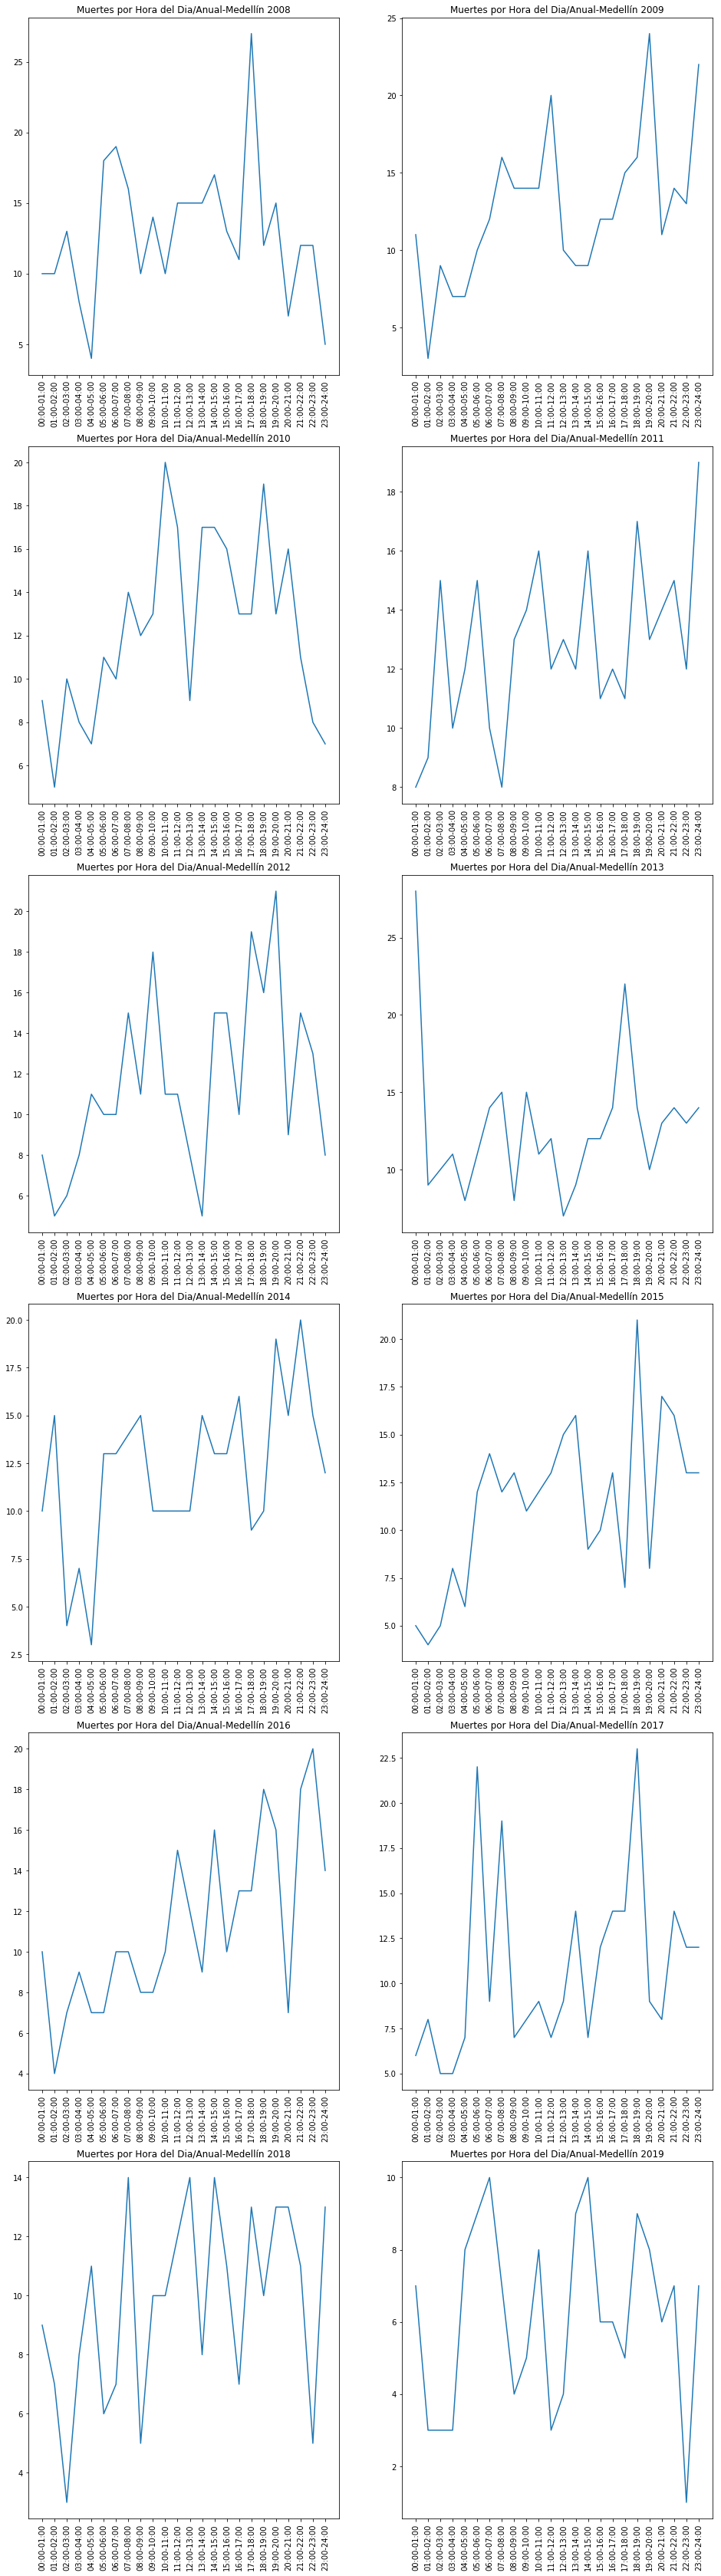

In [34]:
plt.figure(figsize=(16, 60))
for index in range(len(sheets)):
    plt.subplot(len(sheets)/2, 2, index+1)
    y=byhour.loc[byhour.groupby('year').groups[list(byyear['year'])[index]]]
    plt.plot(range(24), y['Muertes'])
    plt.xticks(range(24), ["00:00-01:00","01:00-02:00","02:00-03:00","03:00-04:00","04:00-05:00","05:00-06:00",
                           "06:00-07:00","07:00-08:00","08:00-09:00","09:00-10:00","10:00-11:00","11:00-12:00",
                           "12:00-13:00","13:00-14:00","14:00-15:00","15:00-16:00","16:00-17:00","17:00-18:00",
                           "18:00-19:00","19:00-20:00","20:00-21:00","21:00-22:00","22:00-23:00","23:00-24:00"], rotation='vertical')
    plt.title("Muertes por Hora del Dia/Anual"+"-"+sheets[index]);

In [30]:
df5.dtypes

Fecha Ocurrencia                             datetime64[ns]
Hora Ocurrencia                                      object
Edad Víctima                                         object
Sexo                                                 object
Clase de Accidente                                   object
Condición Víctima                                    object
Vehículo Víctima o vehículo que atropella            object
Dirección Ocurrencia                                 object
Prueba Embriaguez                                    object
Empresa Servicio Público                             object
Fecha Levantamiento                                  object
Lugar de Inspección                                  object
Servicio Publico o Particular                        object
dtype: object